In [1]:
import os
import pandas as pd

from utils.Logger import Logger
from utils.Experiments import Data, DataDomainwise, Settings, TrainOnce, PretrainingFinetuning, DomainAdversarialLearning
from utils.DataPreparation import prepare_data
from utils.Evaluation import evaluate

from Models.CDBLSTM import CDBLSTM
from Models.DACDBLSTM import DACDBLSTM

import tensorflow as tf
tf.version.VERSION

'2.6.0'

In [2]:
project_dir = "../../3_Results/Test/"
os.mkdir(project_dir) if not os.path.exists(project_dir) else None

## Read Data

In [3]:
hdf5_file = "../../1_Data/datasets.h5"
dataset_src = pd.read_hdf(hdf5_file, 'Simulated')
dataset_tar = pd.read_hdf(hdf5_file, 'Office_A')

In [4]:
dataset_src.head(2)

,Day,Time,CO2,Occupancy
0,2020-01-01,00:00:00,360.0,0.0
1,2020-01-01,00:01:00,360.0,0.0


In [5]:
dataset_tar.head(2)

,Day,Time,CO2,Temperature,Humidity,Occupancy
0,0,00:00:00,739.73,26.30,29.73,0
1,0,00:01:00,740.08,26.31,29.74,0


## Target Only Training of CDBLSTM

In [6]:
training_days = 5
x_train, y_train, x_val, y_val, x_test, y_test = prepare_data(dataset_tar['CO2'].values, dataset_tar['Occupancy'].values, 
                                                              splitAt=[training_days*1440, training_days*2*1440], 
                                                              window_size=30)

train-validation-test split
split at [7200, 14400]
train: (7200, 30, 1) (7200, 1)
train: (7200, 30, 1) (7200, 1) test: (100771, 30, 1) (100771, 1)
train: (7200, 30, 1) (7200, 1) validate: (7200, 30, 1) (7200, 1) test: (100771, 30, 1) (100771, 1)
7200 training samples
data normalized to range [0, 1]
train: (7200, 30, 1) (7200, 1) validate: (7200, 30, 1) (7200, 1) test: (100768, 30, 1) (100768, 1)


Seed 0


2022-11-21 17:39:34.471097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31026 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0035:03:00.0, compute capability: 7.0
2022-11-21 17:39:35.444993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-21 17:39:45.494736: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


57/57 - 15s - loss: 0.5893 - Accuracy: 0.6817 - val_loss: 0.6457 - val_Accuracy: 0.6079
Epoch 2/100
57/57 - 1s - loss: 0.5408 - Accuracy: 0.6833 - val_loss: 0.6731 - val_Accuracy: 0.5969
Epoch 3/100
57/57 - 1s - loss: 0.5383 - Accuracy: 0.7007 - val_loss: 0.6380 - val_Accuracy: 0.6263
Epoch 4/100
57/57 - 1s - loss: 0.5333 - Accuracy: 0.7088 - val_loss: 0.6467 - val_Accuracy: 0.5792
Epoch 5/100
57/57 - 1s - loss: 0.5237 - Accuracy: 0.7132 - val_loss: 0.6181 - val_Accuracy: 0.6086
Epoch 6/100
57/57 - 1s - loss: 0.4989 - Accuracy: 0.7144 - val_loss: 0.5535 - val_Accuracy: 0.6169
Epoch 7/100
57/57 - 1s - loss: 0.4818 - Accuracy: 0.7239 - val_loss: 0.5559 - val_Accuracy: 0.6143
Epoch 8/100
57/57 - 1s - loss: 0.4960 - Accuracy: 0.7169 - val_loss: 0.5812 - val_Accuracy: 0.5964
Epoch 9/100
57/57 - 1s - loss: 0.4554 - Accuracy: 0.7224 - val_loss: 0.5853 - val_Accuracy: 0.6004
Epoch 10/100
57/57 - 1s - loss: 0.4504 - Accuracy: 0.7383 - val_loss: 0.5540 - val_Accuracy: 0.6161
Epoch 11/100
57/57 -

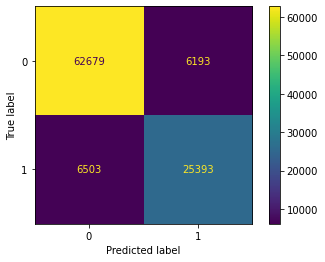

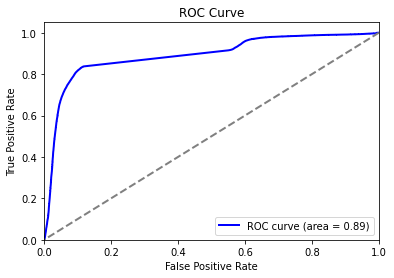

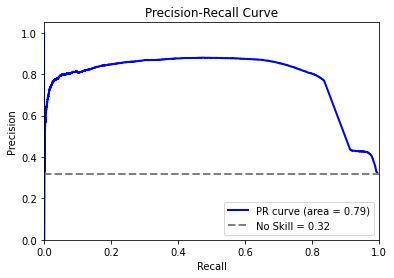

Seed 1
Epoch 1/100
57/57 - 14s - loss: 0.5945 - Accuracy: 0.6719 - val_loss: 0.6679 - val_Accuracy: 0.6111
Epoch 2/100
57/57 - 1s - loss: 0.5482 - Accuracy: 0.6822 - val_loss: 0.6481 - val_Accuracy: 0.5750
Epoch 3/100
57/57 - 1s - loss: 0.5416 - Accuracy: 0.6938 - val_loss: 0.6718 - val_Accuracy: 0.5894
Epoch 4/100
57/57 - 1s - loss: 0.5332 - Accuracy: 0.6999 - val_loss: 0.6650 - val_Accuracy: 0.5797
Epoch 5/100
57/57 - 1s - loss: 0.5315 - Accuracy: 0.7029 - val_loss: 0.6596 - val_Accuracy: 0.5789
Epoch 6/100
57/57 - 1s - loss: 0.5190 - Accuracy: 0.7118 - val_loss: 0.6758 - val_Accuracy: 0.5821
Epoch 7/100
57/57 - 1s - loss: 0.5186 - Accuracy: 0.7085 - val_loss: 0.6358 - val_Accuracy: 0.5804
Epoch 8/100
57/57 - 1s - loss: 0.5031 - Accuracy: 0.7168 - val_loss: 0.6044 - val_Accuracy: 0.5813
Epoch 9/100
57/57 - 1s - loss: 0.4873 - Accuracy: 0.7135 - val_loss: 0.5558 - val_Accuracy: 0.6074
Epoch 10/100
57/57 - 1s - loss: 0.4691 - Accuracy: 0.7129 - val_loss: 0.6855 - val_Accuracy: 0.5813
E

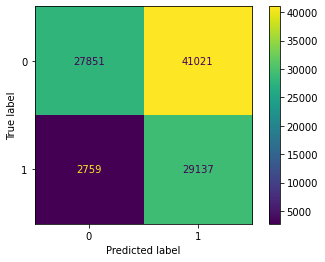

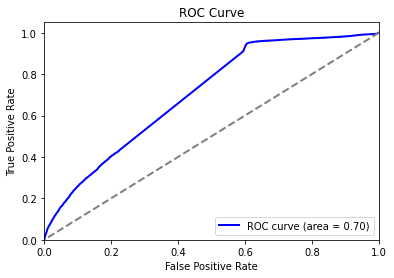

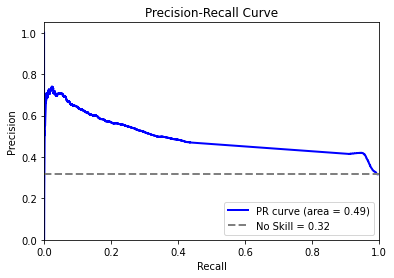

In [7]:
path = project_dir + "test_targetOnly"
data = Data(x_train, y_train, x_val, y_val, x_test, y_test)
settings = Settings(path, CDBLSTM, trials=2, epochs=100, verbose=2)
experiment = TrainOnce(data, settings)
experiment.run()

## Domain-Adversarial Learning

In [8]:
training_days=5
x_train, y_train, x_val, y_val, x_test, y_test = prepare_data(dataset_tar['CO2'].values, dataset_tar['Occupancy'].values,
                                                                              [dataset_src['CO2'].values], [dataset_src['Occupancy'].values],
                                                                              splitAt=[training_days*1440, training_days*2*1440], window_size=30)

train-validation-test split
split at [7200, 14400]
train: (7200, 30, 1) (7200, 1)
train: (7200, 30, 1) (7200, 1) test: (100771, 30, 1) (100771, 1)
train: (7200, 30, 1) (7200, 1) validate: (7200, 30, 1) (7200, 1) test: (100771, 30, 1) (100771, 1)
7200 training samples from target domain
143971 training samples from source domain 1
data normalized to range [0, 1]
train: (151168, 30, 1) (2, 151168, 1) validate: (7200, 30, 1) (2, 7200, 1) test: (100768, 30, 1) (2, 100768, 1)


Seed 0
['window_size=30']
Epoch 1/100
1181/1181 - 55s - loss: 0.6639 - task_output_loss: 0.4013 - domain_output_loss: 0.2626 - task_output_accuracy: 0.8153 - domain_output_accuracy: 0.9408 - val_loss: 3.1351 - val_task_output_loss: 0.2781 - val_domain_output_loss: 2.8570 - val_task_output_accuracy: 0.9225 - val_domain_output_accuracy: 0.0000e+00
Epoch 2/100
1181/1181 - 35s - loss: 0.4248 - task_output_loss: 0.2338 - domain_output_loss: 0.1910 - task_output_accuracy: 0.9211 - domain_output_accuracy: 0.9524 - val_loss: 3.7257 - val_task_output_loss: 0.9675 - val_domain_output_loss: 2.7582 - val_task_output_accuracy: 0.6040 - val_domain_output_accuracy: 0.0000e+00
Epoch 3/100
1181/1181 - 35s - loss: 0.3833 - task_output_loss: 0.1941 - domain_output_loss: 0.1892 - task_output_accuracy: 0.9393 - domain_output_accuracy: 0.9524 - val_loss: 3.1365 - val_task_output_loss: 0.3084 - val_domain_output_loss: 2.8281 - val_task_output_accuracy: 0.9010 - val_domain_output_accuracy: 0.0000e+00
Epoch 4/

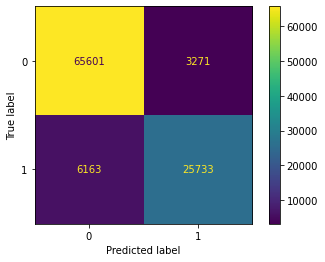

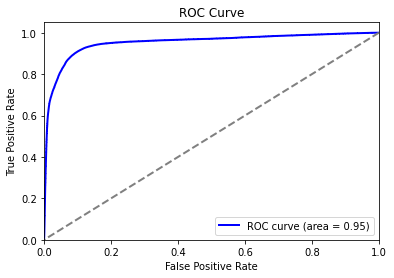

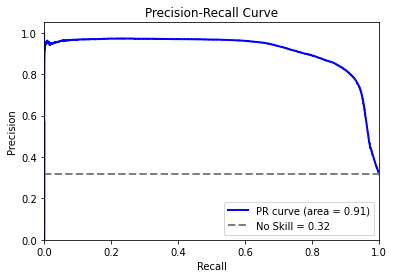

Seed 1
['window_size=30']
Epoch 1/100
1181/1181 - 54s - loss: 0.5685 - task_output_loss: 0.3636 - domain_output_loss: 0.2049 - task_output_accuracy: 0.8388 - domain_output_accuracy: 0.9432 - val_loss: 2.9429 - val_task_output_loss: 0.3860 - val_domain_output_loss: 2.5570 - val_task_output_accuracy: 0.8853 - val_domain_output_accuracy: 0.0000e+00
Epoch 2/100
1181/1181 - 36s - loss: 0.3925 - task_output_loss: 0.2071 - domain_output_loss: 0.1853 - task_output_accuracy: 0.9341 - domain_output_accuracy: 0.9524 - val_loss: 2.9451 - val_task_output_loss: 0.2641 - val_domain_output_loss: 2.6810 - val_task_output_accuracy: 0.9285 - val_domain_output_accuracy: 0.0000e+00
Epoch 3/100
1181/1181 - 36s - loss: 0.3628 - task_output_loss: 0.1749 - domain_output_loss: 0.1879 - task_output_accuracy: 0.9468 - domain_output_accuracy: 0.9524 - val_loss: 3.3012 - val_task_output_loss: 0.2772 - val_domain_output_loss: 3.0239 - val_task_output_accuracy: 0.9082 - val_domain_output_accuracy: 0.0000e+00
Epoch 4/

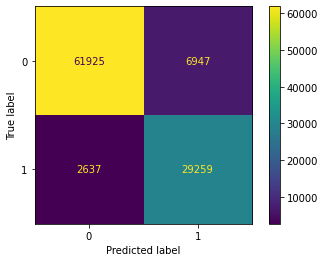

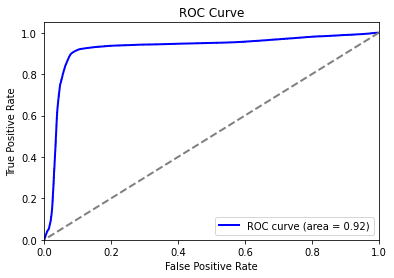

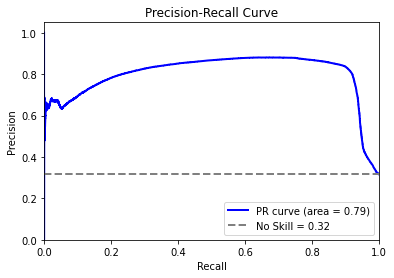

In [9]:
path = project_dir + "test_DA"
data = Data(x_train, y_train, x_val, y_val, x_test, y_test[0])
settings = Settings(path, DACDBLSTM, trials=2, epochs=100, verbose=2)
experiment = DomainAdversarialLearning(data, settings, domain_clf_position=2)
experiment.run()

## Pretraining & Fine-Tuning

In [10]:
training_days = 5
x_tar_train, y_tar_train, x_tar_val, y_tar_val, x_test, y_test = \
                            prepare_data(dataset_tar['CO2'].values, dataset_tar['Occupancy'].values, 
                                            splitAt=[training_days*1440, training_days*2*1440], 
                                            window_size=30)

x_src_train, y_src_train, x_src_val, y_src_val = \
                            prepare_data(dataset_src['CO2'].values, dataset_src['Occupancy'].values, 
                                            splitAt=0.8, window_size=30)

train-validation-test split
split at [7200, 14400]
train: (7200, 30, 1) (7200, 1)
train: (7200, 30, 1) (7200, 1) test: (100771, 30, 1) (100771, 1)
train: (7200, 30, 1) (7200, 1) validate: (7200, 30, 1) (7200, 1) test: (100771, 30, 1) (100771, 1)
7200 training samples
data normalized to range [0, 1]
train: (7200, 30, 1) (7200, 1) validate: (7200, 30, 1) (7200, 1) test: (100768, 30, 1) (100768, 1)
train-test split
split at index 115177
train: (115177, 30, 1) (115177, 1)
train: (115177, 30, 1) (115177, 1) test: (28794, 30, 1) (28794, 1)
115177 training samples
data normalized to range [0, 1]
train: (115168, 30, 1) (115168, 1) test: (28768, 30, 1) (28768, 1)


Seed 0  - Pretraining
Epoch 1/100
900/900 - 27s - loss: 0.3851 - Accuracy: 0.8315 - val_loss: 0.2528 - val_Accuracy: 0.9312
Epoch 2/100
900/900 - 14s - loss: 0.2169 - Accuracy: 0.9312 - val_loss: 0.1848 - val_Accuracy: 0.9457
Epoch 3/100
900/900 - 14s - loss: 0.1940 - Accuracy: 0.9407 - val_loss: 0.1900 - val_Accuracy: 0.9475
Epoch 4/100
900/900 - 14s - loss: 0.2051 - Accuracy: 0.9386 - val_loss: 0.1672 - val_Accuracy: 0.9494
Epoch 5/100
900/900 - 13s - loss: 0.1870 - Accuracy: 0.9443 - val_loss: 0.1603 - val_Accuracy: 0.9520
Epoch 6/100
900/900 - 14s - loss: 0.1915 - Accuracy: 0.9377 - val_loss: 0.1626 - val_Accuracy: 0.9496
Epoch 7/100
900/900 - 14s - loss: 0.1751 - Accuracy: 0.9467 - val_loss: 0.1498 - val_Accuracy: 0.9531
Epoch 8/100
900/900 - 14s - loss: 0.1663 - Accuracy: 0.9497 - val_loss: 0.1545 - val_Accuracy: 0.9524
Epoch 9/100
900/900 - 14s - loss: 0.1599 - Accuracy: 0.9520 - val_loss: 0.1566 - val_Accuracy: 0.9563
Epoch 10/100
900/900 - 14s - loss: 0.1618 - Accuracy: 0.9510

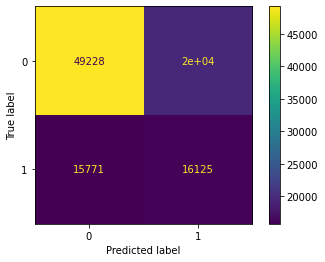

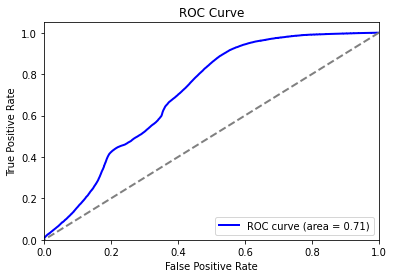

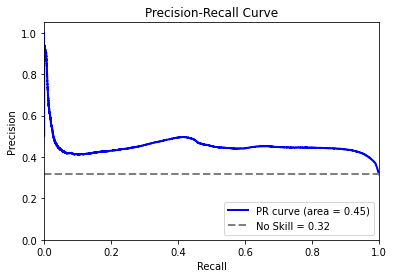

Seed 0  - Fine-Tuning
Epoch 1/100
57/57 - 9s - loss: 0.4312 - Accuracy: 0.8006 - val_loss: 0.4191 - val_Accuracy: 0.8064
Epoch 2/100
57/57 - 1s - loss: 0.2396 - Accuracy: 0.9053 - val_loss: 1.6198 - val_Accuracy: 0.5775
Epoch 3/100
57/57 - 1s - loss: 0.4562 - Accuracy: 0.8104 - val_loss: 0.3728 - val_Accuracy: 0.8506
Epoch 4/100
57/57 - 1s - loss: 0.2160 - Accuracy: 0.9256 - val_loss: 0.2074 - val_Accuracy: 0.9317
Epoch 5/100
57/57 - 1s - loss: 0.1505 - Accuracy: 0.9517 - val_loss: 0.1921 - val_Accuracy: 0.9492
Epoch 6/100
57/57 - 1s - loss: 0.1810 - Accuracy: 0.9424 - val_loss: 0.1808 - val_Accuracy: 0.9478
Epoch 7/100
57/57 - 1s - loss: 0.1263 - Accuracy: 0.9608 - val_loss: 0.1928 - val_Accuracy: 0.9397
Epoch 8/100
57/57 - 1s - loss: 0.1061 - Accuracy: 0.9692 - val_loss: 0.1806 - val_Accuracy: 0.9500
Epoch 9/100
57/57 - 1s - loss: 0.1016 - Accuracy: 0.9711 - val_loss: 0.1764 - val_Accuracy: 0.9515
Epoch 10/100
57/57 - 1s - loss: 0.0923 - Accuracy: 0.9744 - val_loss: 0.2240 - val_Accu

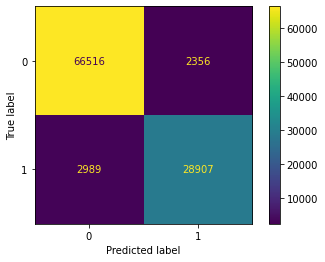

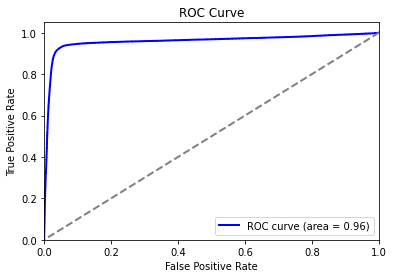

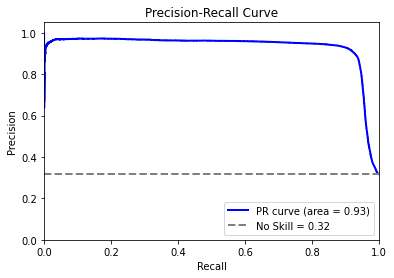

Seed 1  - Pretraining
Epoch 1/100
900/900 - 27s - loss: 0.3888 - Accuracy: 0.8306 - val_loss: 0.2353 - val_Accuracy: 0.9293
Epoch 2/100
900/900 - 14s - loss: 0.2177 - Accuracy: 0.9306 - val_loss: 0.1856 - val_Accuracy: 0.9423
Epoch 3/100
900/900 - 14s - loss: 0.2256 - Accuracy: 0.9262 - val_loss: 0.1737 - val_Accuracy: 0.9436
Epoch 4/100
900/900 - 14s - loss: 0.1954 - Accuracy: 0.9395 - val_loss: 0.1781 - val_Accuracy: 0.9456
Epoch 5/100
900/900 - 14s - loss: 0.1898 - Accuracy: 0.9414 - val_loss: 0.1668 - val_Accuracy: 0.9490
Epoch 6/100
900/900 - 15s - loss: 0.1782 - Accuracy: 0.9454 - val_loss: 0.1579 - val_Accuracy: 0.9511
Epoch 7/100
900/900 - 14s - loss: 0.1786 - Accuracy: 0.9450 - val_loss: 0.1623 - val_Accuracy: 0.9504
Epoch 8/100
900/900 - 14s - loss: 0.1702 - Accuracy: 0.9478 - val_loss: 0.1583 - val_Accuracy: 0.9511
Epoch 9/100
900/900 - 14s - loss: 0.1708 - Accuracy: 0.9464 - val_loss: 0.1472 - val_Accuracy: 0.9556
Epoch 10/100
900/900 - 14s - loss: 0.1798 - Accuracy: 0.9419

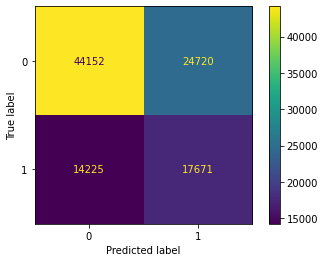

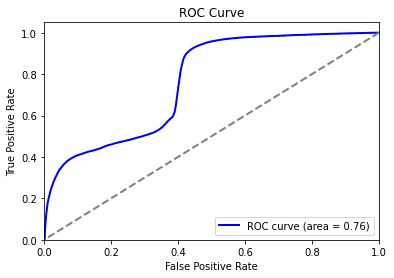

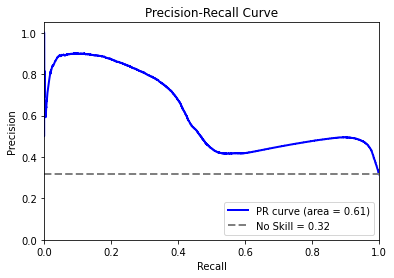

Seed 1  - Fine-Tuning
Epoch 1/100
57/57 - 9s - loss: 0.3955 - Accuracy: 0.8232 - val_loss: 0.3832 - val_Accuracy: 0.8542
Epoch 2/100
57/57 - 1s - loss: 0.2404 - Accuracy: 0.9236 - val_loss: 0.1976 - val_Accuracy: 0.9292
Epoch 3/100
57/57 - 1s - loss: 0.2865 - Accuracy: 0.8928 - val_loss: 0.1959 - val_Accuracy: 0.9371
Epoch 4/100
57/57 - 1s - loss: 0.1641 - Accuracy: 0.9453 - val_loss: 0.5358 - val_Accuracy: 0.7586
Epoch 5/100
57/57 - 1s - loss: 0.1387 - Accuracy: 0.9581 - val_loss: 0.2204 - val_Accuracy: 0.9207
Epoch 6/100
57/57 - 1s - loss: 0.1100 - Accuracy: 0.9678 - val_loss: 0.1841 - val_Accuracy: 0.9433
Epoch 7/100
57/57 - 1s - loss: 0.1110 - Accuracy: 0.9667 - val_loss: 0.2075 - val_Accuracy: 0.9346
Epoch 8/100
57/57 - 1s - loss: 0.1448 - Accuracy: 0.9511 - val_loss: 0.1832 - val_Accuracy: 0.9444
Epoch 9/100
57/57 - 1s - loss: 0.1027 - Accuracy: 0.9711 - val_loss: 0.2471 - val_Accuracy: 0.9254
Epoch 10/100
57/57 - 1s - loss: 0.1291 - Accuracy: 0.9560 - val_loss: 0.1910 - val_Accu

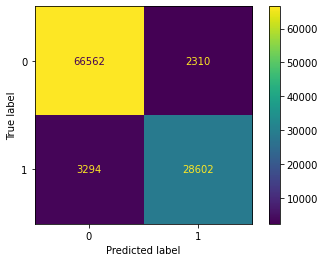

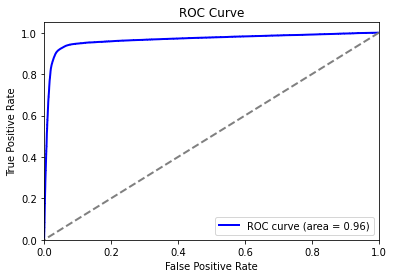

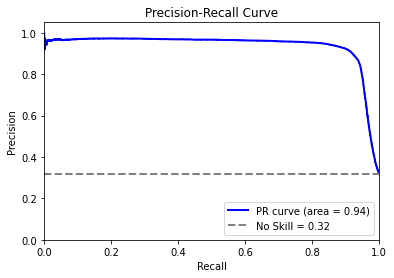

In [11]:
path = project_dir + "pretrainingFineTuning"
data = DataDomainwise(x_tar_train, y_tar_train, x_tar_val, y_tar_val, 
                      x_src_train, y_src_train, x_src_val, y_src_val, x_test, y_test)
settings = Settings(path, CDBLSTM, trials=2, epochs=100, verbose=2)
experiment = PretrainingFinetuning(data, settings)
experiment.run()

## Layer Freezing

Seed 0  - Pretraining
Epoch 1/100
900/900 - 28s - loss: 0.3806 - Accuracy: 0.8327 - val_loss: 0.2324 - val_Accuracy: 0.9141
Epoch 2/100
900/900 - 15s - loss: 0.2118 - Accuracy: 0.9334 - val_loss: 0.1853 - val_Accuracy: 0.9438
Epoch 3/100
900/900 - 14s - loss: 0.1996 - Accuracy: 0.9393 - val_loss: 0.1768 - val_Accuracy: 0.9501
Epoch 4/100
900/900 - 14s - loss: 0.1879 - Accuracy: 0.9441 - val_loss: 0.1772 - val_Accuracy: 0.9439
Epoch 5/100
900/900 - 14s - loss: 0.1925 - Accuracy: 0.9401 - val_loss: 0.1652 - val_Accuracy: 0.9481
Epoch 6/100
900/900 - 14s - loss: 0.1718 - Accuracy: 0.9489 - val_loss: 0.1500 - val_Accuracy: 0.9559
Epoch 7/100
900/900 - 14s - loss: 0.1632 - Accuracy: 0.9512 - val_loss: 0.1487 - val_Accuracy: 0.9564
Epoch 8/100
900/900 - 14s - loss: 0.1661 - Accuracy: 0.9496 - val_loss: 0.1385 - val_Accuracy: 0.9565
Epoch 9/100
900/900 - 15s - loss: 0.1584 - Accuracy: 0.9531 - val_loss: 0.1385 - val_Accuracy: 0.9584
Epoch 10/100
900/900 - 15s - loss: 0.1538 - Accuracy: 0.9549

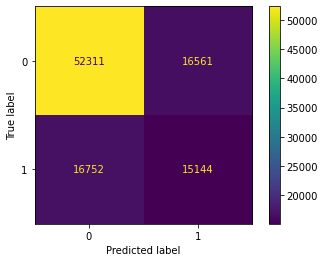

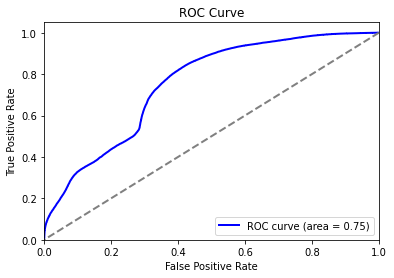

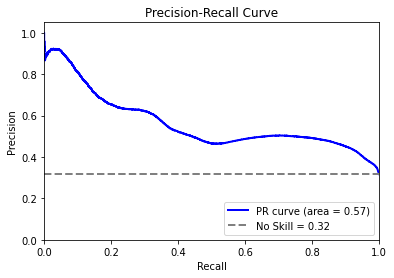

trainable layers:
[('conv1d_8', False), ('max_pooling1d_8', False), ('conv1d_9', False), ('max_pooling1d_9', False), ('bidirectional_12', True), ('bidirectional_13', True), ('bidirectional_14', True), ('dropout_4', True), ('dense_8', True), ('dense_9', True)]
Seed 0  - Fine-Tuning
Epoch 1/100
57/57 - 9s - loss: 0.4266 - Accuracy: 0.8138 - val_loss: 0.4072 - val_Accuracy: 0.8240
Epoch 2/100
57/57 - 1s - loss: 0.2660 - Accuracy: 0.8918 - val_loss: 0.2867 - val_Accuracy: 0.9015
Epoch 3/100
57/57 - 1s - loss: 0.2407 - Accuracy: 0.9031 - val_loss: 0.3940 - val_Accuracy: 0.8275
Epoch 4/100
57/57 - 1s - loss: 0.1728 - Accuracy: 0.9414 - val_loss: 0.7191 - val_Accuracy: 0.7100
Epoch 5/100
57/57 - 1s - loss: 0.1728 - Accuracy: 0.9394 - val_loss: 0.2790 - val_Accuracy: 0.9071
Epoch 6/100
57/57 - 1s - loss: 0.1188 - Accuracy: 0.9642 - val_loss: 0.2293 - val_Accuracy: 0.9347
Epoch 7/100
57/57 - 1s - loss: 0.1053 - Accuracy: 0.9685 - val_loss: 0.2214 - val_Accuracy: 0.9410
Epoch 8/100
57/57 - 1s - 

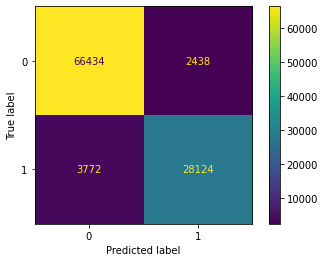

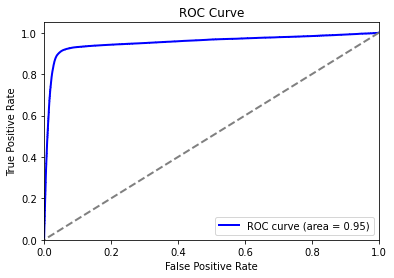

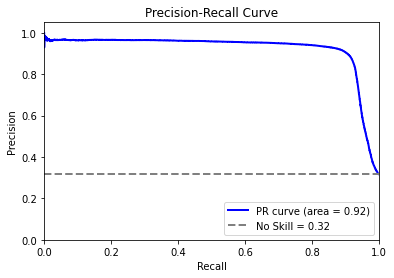

Seed 1  - Pretraining
Epoch 1/100
900/900 - 26s - loss: 0.3769 - Accuracy: 0.8385 - val_loss: 0.2038 - val_Accuracy: 0.9334
Epoch 2/100
900/900 - 14s - loss: 0.2187 - Accuracy: 0.9297 - val_loss: 0.1928 - val_Accuracy: 0.9391
Epoch 3/100
900/900 - 14s - loss: 0.1986 - Accuracy: 0.9381 - val_loss: 0.1753 - val_Accuracy: 0.9453
Epoch 4/100
900/900 - 14s - loss: 0.1919 - Accuracy: 0.9404 - val_loss: 0.1736 - val_Accuracy: 0.9475
Epoch 5/100
900/900 - 14s - loss: 0.1816 - Accuracy: 0.9445 - val_loss: 0.1753 - val_Accuracy: 0.9492
Epoch 6/100
900/900 - 14s - loss: 0.1752 - Accuracy: 0.9460 - val_loss: 0.1549 - val_Accuracy: 0.9512
Epoch 7/100
900/900 - 14s - loss: 0.1751 - Accuracy: 0.9448 - val_loss: 0.2081 - val_Accuracy: 0.9373
Epoch 8/100
900/900 - 14s - loss: 0.1795 - Accuracy: 0.9450 - val_loss: 0.1633 - val_Accuracy: 0.9488
Epoch 9/100
900/900 - 14s - loss: 0.1663 - Accuracy: 0.9496 - val_loss: 0.1709 - val_Accuracy: 0.9448
Epoch 10/100
900/900 - 14s - loss: 0.1644 - Accuracy: 0.9497

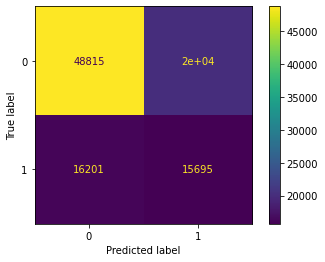

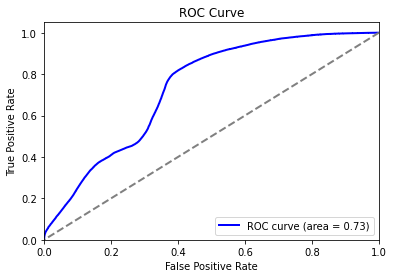

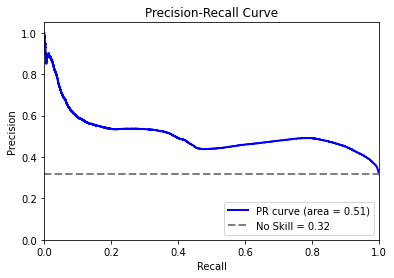

trainable layers:
[('conv1d_10', False), ('max_pooling1d_10', False), ('conv1d_11', False), ('max_pooling1d_11', False), ('bidirectional_15', True), ('bidirectional_16', True), ('bidirectional_17', True), ('dropout_5', True), ('dense_10', True), ('dense_11', True)]
Seed 1  - Fine-Tuning
Epoch 1/100
57/57 - 9s - loss: 0.4561 - Accuracy: 0.7892 - val_loss: 0.4012 - val_Accuracy: 0.8194
Epoch 2/100
57/57 - 1s - loss: 0.2939 - Accuracy: 0.8819 - val_loss: 0.3863 - val_Accuracy: 0.8449
Epoch 3/100
57/57 - 1s - loss: 0.2564 - Accuracy: 0.8968 - val_loss: 0.3550 - val_Accuracy: 0.8674
Epoch 4/100
57/57 - 1s - loss: 0.2184 - Accuracy: 0.9190 - val_loss: 0.3890 - val_Accuracy: 0.8339
Epoch 5/100
57/57 - 1s - loss: 0.1886 - Accuracy: 0.9326 - val_loss: 0.2372 - val_Accuracy: 0.9321
Epoch 6/100
57/57 - 1s - loss: 0.1692 - Accuracy: 0.9388 - val_loss: 0.2408 - val_Accuracy: 0.9254
Epoch 7/100
57/57 - 1s - loss: 0.1282 - Accuracy: 0.9579 - val_loss: 0.2955 - val_Accuracy: 0.9074
Epoch 8/100
57/57 -

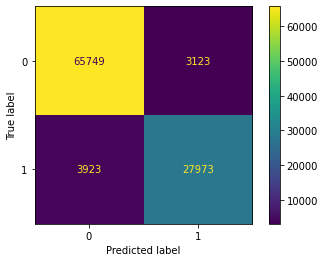

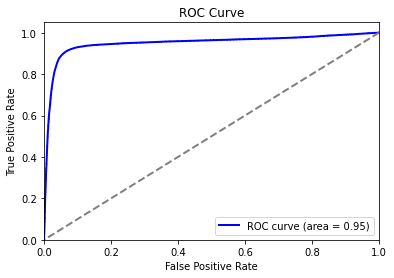

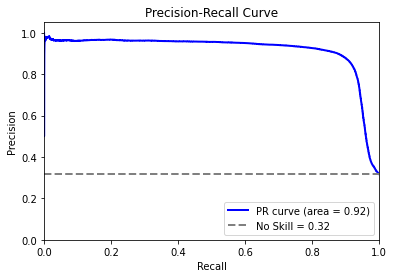

In [12]:
path = project_dir + "layerFreezing"
settings = Settings(path, CDBLSTM, trials=2, epochs=100, verbose=2)
experiment = PretrainingFinetuning(data, settings, freeze_first_n_layers=4, # 4 = freeze CNN
                                   save_as = ["layerFreezing_pre", "layerFreezing_fine"]) 
experiment.run()